In [1]:
import os
bing_key = os.environ["BING_KEY"]

'ac550aca237b47a98bd59ff0f7a60ebe'

In [6]:
from fastai.vision.widgets import *
from utils import *

In [8]:
path = Path("rackets")
types = ["padel", "tennis"]

if not path.exists():
    path.mkdir()
    for racket_type in types:
        dest = (path/racket_type)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(bing_key, racket_type + "racket")
        download_images(dest, urls=results.attrgot("content_url"))

In [9]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

(#1) [None]

In [10]:
rackets = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [11]:
dls = rackets.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/marcus/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.55MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.366385,0.036014,0.016949,00:33
1,0.213761,0.015733,0.000000,00:32
2,0.154096,0.015410,0.000000,00:32
3,0.119771,0.022388,0.016949,00:32


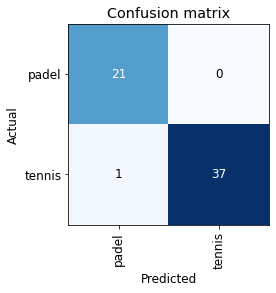

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

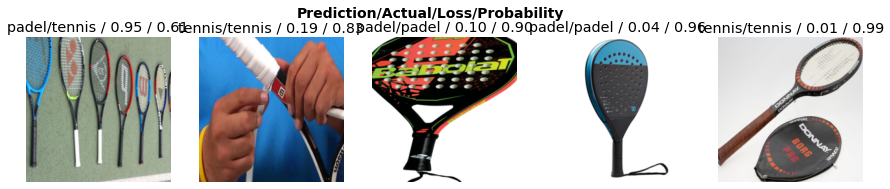

In [14]:
interp.plot_top_losses(5, nrows=1)

In [15]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
learn.export()